In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

## Display Settings Adjustments
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", None)

In [3]:
## Read in Dataset
countries_data_raw = pd.read_csv('C:/Users/fillm/Desktop/Job Search Materials/Materials for Portfolio Project Creation/Unsupervised Learning/dataset/Country-data.csv')


In [4]:
## View Dataset
countries_data_raw.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
## Check if any values are missing in any variables
countries_data_raw.info(verbose = True, show_counts= True) ## no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
## Confirm data is unique by country
countries_data_raw['country'].value_counts().unique()
countries_data_raw['country'].value_counts()

array([1], dtype=int64)

country
Afghanistan                       1
Morocco                           1
Myanmar                           1
Namibia                           1
Nepal                             1
Netherlands                       1
New Zealand                       1
Niger                             1
Nigeria                           1
Norway                            1
Oman                              1
Pakistan                          1
Panama                            1
Paraguay                          1
Peru                              1
Philippines                       1
Poland                            1
Portugal                          1
Qatar                             1
Mozambique                        1
Montenegro                        1
Russia                            1
Mongolia                          1
Lebanon                           1
Lesotho                           1
Liberia                           1
Libya                             1
Lithuania           

In [7]:
## Drop ID variables and any variables that are not related to the well-being of a country (if any)
countries_data = countries_data_raw.drop('country', axis = 1) ## Drop the countries column which only is essentially an ID variable

In [8]:
countries_data ## all remaining features are numeric

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [9]:
## Instantiate Standard Scaler Object
scaler = StandardScaler()

## Apply Standard Scaler to features
countries_scaled = scaler.fit_transform(countries_data)

## Convert Back to a Dataframe after applying standard scaler
countries_scaled = pd.DataFrame(countries_scaled, columns = countries_data.columns)

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance %')

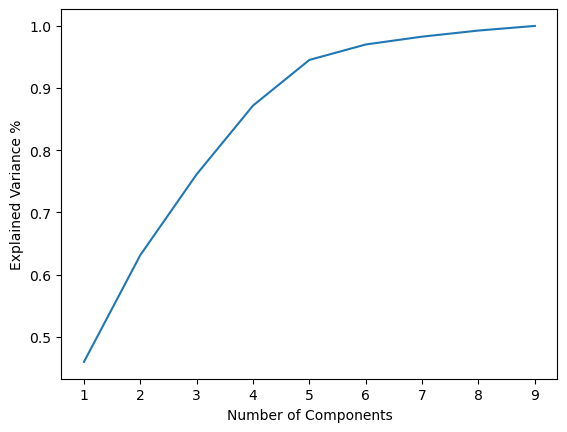

In [10]:
## Fit a PCA object to the data
pca_for_graph = PCA().fit(countries_scaled)

## Create a Series from the explained variance percentages
expl_variances = pd.Series(pca_for_graph.explained_variance_ratio_)

## Increase the index of the series by 1, so that the plot shows the correct number of Components on the X-Axis
expl_variances.index +=1

## Create a Graph that displays the explained variance for each Number of Components
plt.figure()
plt.plot(np.cumsum(expl_variances))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance %')


In [11]:
## Apply PCA, using specific number of components after assessing graph above
## Going to reduce dataset to 5 dimensions, based on graph above, retaining roughly 95% of information in data

## Instantiate PCA Object that reduces to 5 dimensions
pca5 = PCA(n_components = 5)

## Transform data using PCA object
countries_scaled_reduced = pca5.fit_transform(countries_scaled)

In [12]:
## Convert Back to a Dataframe after applying PCA
countries_scaled_reduced = pd.DataFrame(countries_scaled_reduced)
countries_scaled_reduced

,0,1,2,3,4
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
5,0.022407,-1.779187,0.869997,-0.036967,0.981057
6,-0.101584,-0.568252,0.242092,-1.466266,-0.055992
7,2.342165,-1.988459,0.190344,1.105038,-0.731192
8,2.973764,-0.734689,-0.519766,1.205442,0.083580
9,-0.181487,-0.402866,0.867459,-0.438773,0.137350


C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=1, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=2, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=4, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=5, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=6, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=7, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=9, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=10, n_init=50, random_state=42)

<Figure size 640x480 with 0 Axes>

([<matplotlib.axis.XTick at 0x2191b266ed0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Inertia (SSE)')

4

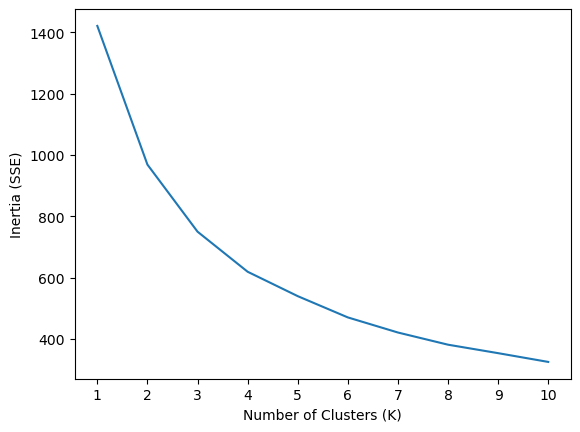

In [13]:
### Determining Correct K (Number of Clusters)

## Elbow Method (Run Model with a Range of K values and plot inertia against K)

# Define list to store inertia scores for each different number of K
inertia_scores = []

# Define a Loop that creates a Cluster object with varying number of K (1 to 10) and store inertia from each
for K in range(1, 11):
    kmeans = KMeans(n_clusters = K, init="k-means++",n_init = 50, max_iter = 500, random_state = 42)
    kmeans.fit(countries_scaled_reduced)
    inertia_scores.append(kmeans.inertia_)

## Create a Graph that displays the explained variance for each Number of Components
plt.figure()
plt.plot(range(1, 11), inertia_scores)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')

# Using the Knee Locator, the elbow in the curve is at 4 clusters, suggesting this is the appropriate number for K 
knee = KneeLocator(range(1, 11), inertia_scores, curve="convex", direction="decreasing")
knee.elbow

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=2, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=4, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=5, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=6, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=7, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=9, n_init=50, random_state=42)

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=10, n_init=50, random_state=42)

<Figure size 640x480 with 0 Axes>

([<matplotlib.axis.XTick at 0x2191b9b9f10>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Silhouette Coefficients')

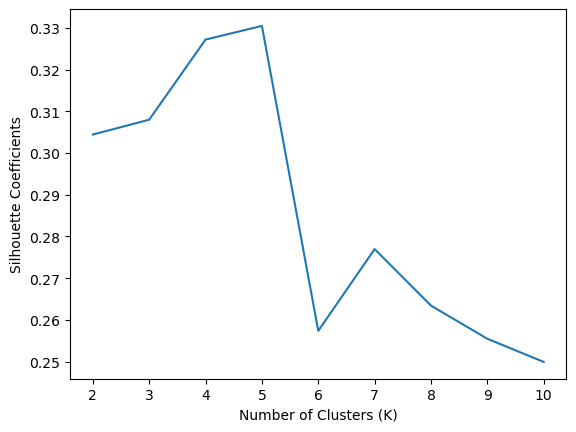

In [14]:
## Silhouette Score
# Define list to store silhouette coefficients for each different number of K
silhouette_coeffs = []

# Define a Loop that creates a Cluster object with varying number of K (2 to 10) and store Silhouette Coefficient from each
for K in range(2, 11):
    kmeans = KMeans(n_clusters = K, init="k-means++", n_init = 50, max_iter = 500, random_state = 42)
    kmeans.fit(countries_scaled_reduced)
    coeff = silhouette_score(countries_scaled_reduced, kmeans.labels_)
    silhouette_coeffs.append(coeff)

## Create a Graph that displays the explained variance for each Number of Components
plt.figure()
plt.plot(range(2, 11), silhouette_coeffs)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficients')

## Based on Review of plot, 5 is suggested as the best choice as it maximizes the silhouette coefficient, but 4 is nearly as good


In [15]:
## Instantiate K-Means Object
## Based on Analysis using Elbow Method and Silhouette Scores, choosing 4 as number of clusters
kmeans = KMeans(n_clusters = 4, init="k-means++", n_init = 50, max_iter = 500, random_state = 42)

## Fit K-Means Clusterer to data and obtain assigned cluster for each country
cluster_assignments = kmeans.fit_predict(countries_scaled_reduced)

## Create Cluster Assignment Column in Original Dataframe
countries_data_raw['cluster_assignments'] = cluster_assignments

C:\Users\fillm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
## View the Original Dataframe now with Cluster Assignments
countries_data_raw


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_assignments
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900,3
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,3
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,0


In [46]:
## Create a Dataframe that shows means of each feature by cluster assignment
means_df = countries_data_raw.loc[:, 'child_mort':'cluster_assignments'].groupby('cluster_assignments').mean()

## Based on review of the means, countries assigned to cluster 2 appear to be the worst off countries
means_df

In [52]:
## Print List of Countries that are in direst need of aid
countries_data_raw[countries_data_raw['cluster_assignments'] == 2].loc[:, 'country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     